In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
my2data=pd.read_csv('/content/seattle-weather.csv')
my2data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
my2data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
#checking any null values
my2data.isnull().sum()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
# converting data to dataframe
my2data['date'] = pd.to_datetime(my2data['date'])


<ipython-input-7-6d0483030b67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'weather', data = my2data, palette="ch:start=.2,rot=-.3")


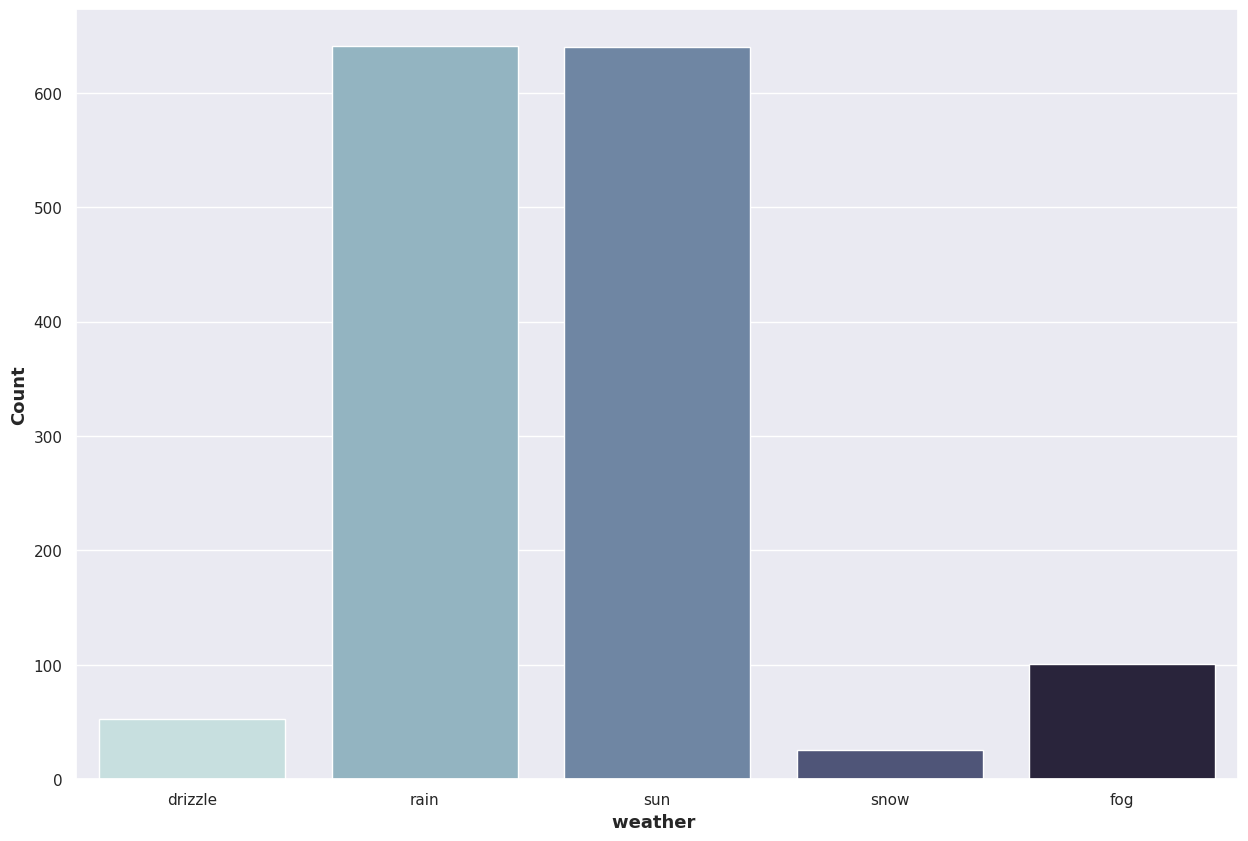

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme()
sns.countplot(x = 'weather', data = my2data, palette="ch:start=.2,rot=-.3")
plt.xlabel("weather ",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

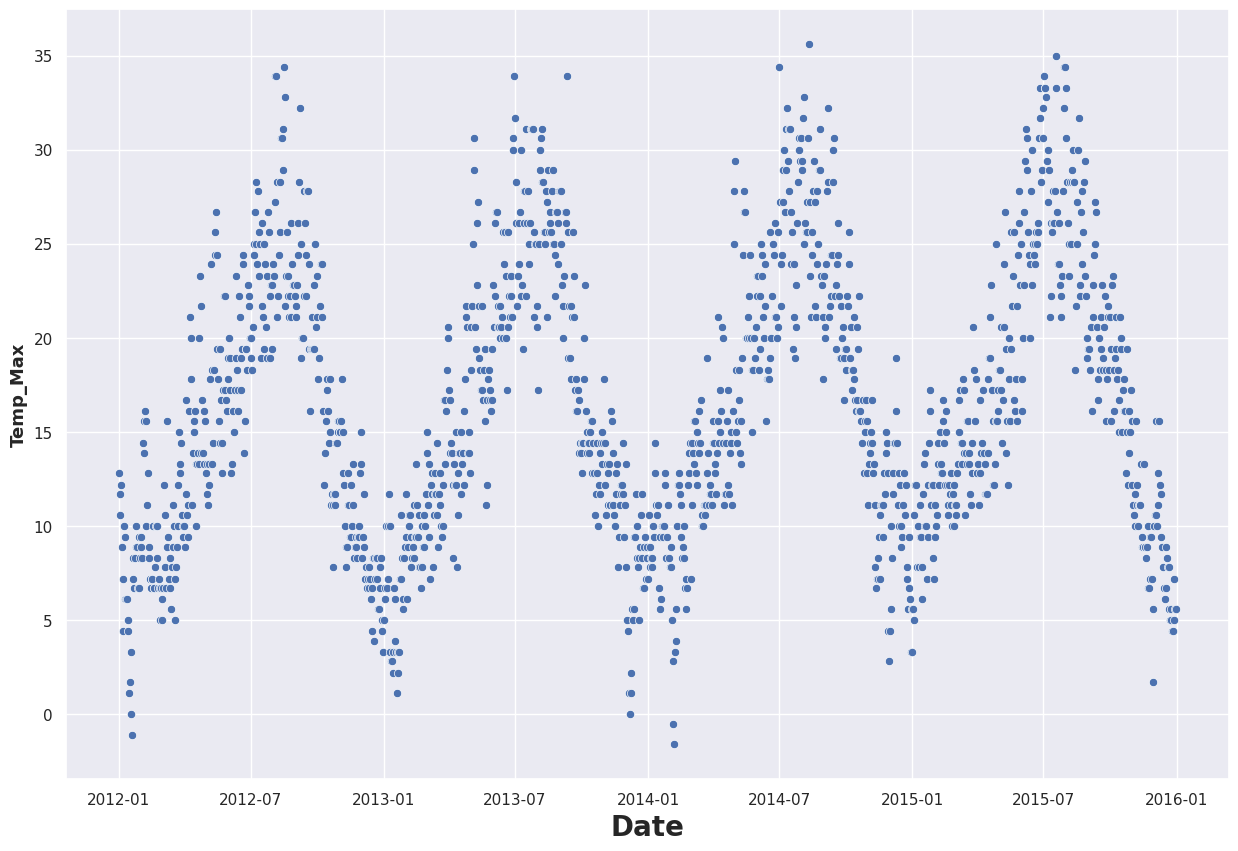

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme()
sns.scatterplot(x = 'date',y='temp_max',data=my2data)
plt.xlabel("Date",fontweight='bold',size=20)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

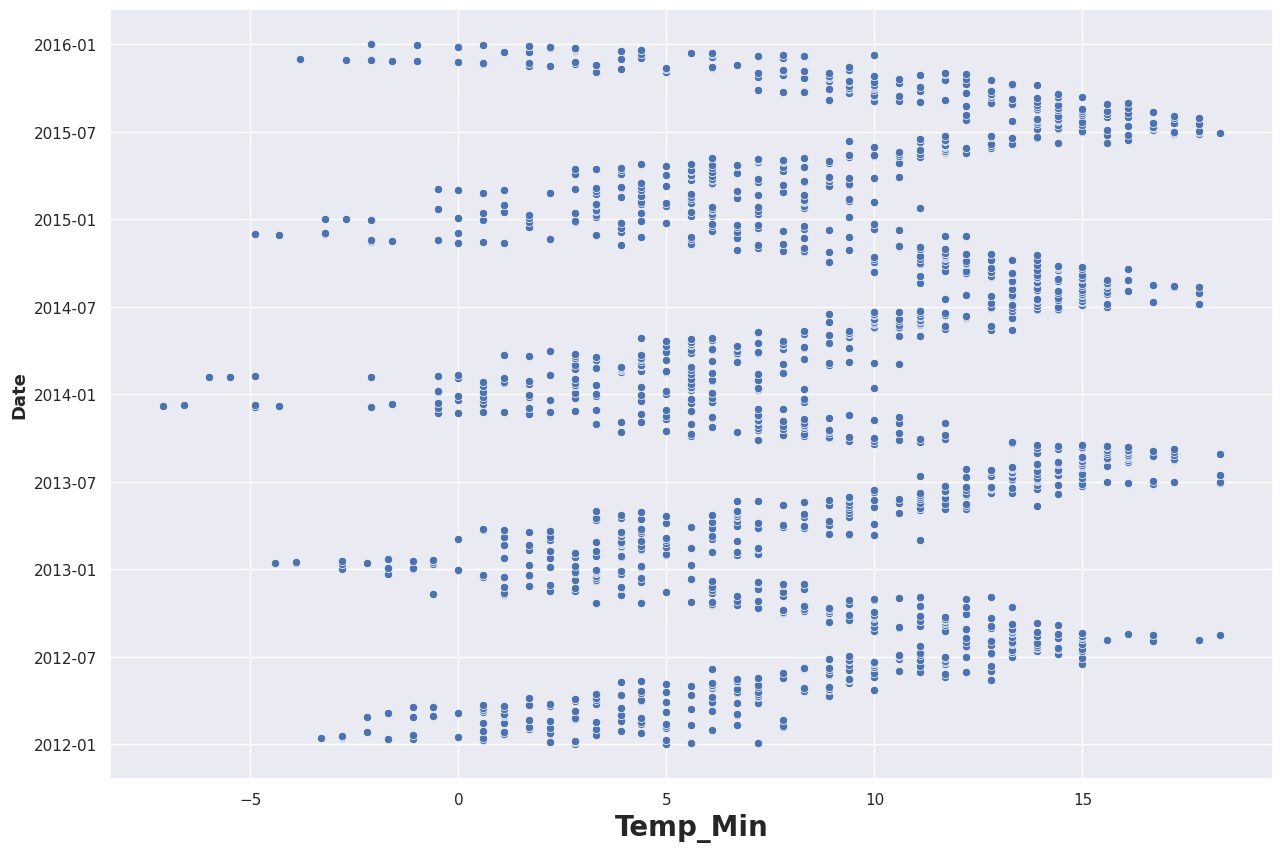

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme()
sns.scatterplot(x = 'temp_min',y='date',data=my2data)
plt.xlabel("Temp_Min",fontweight='bold',size=20)
plt.ylabel("Date",fontweight='bold',size=13)
plt.show()

In [ ]:
# starting linear regression model
# 1st have to transform our data to data encoder because phthone wont accept object values
from sklearn import preprocessing

def LABEL_ENCODING(w1):
    label_encoder = preprocessing.LabelEncoder()
    my2data[w1]= label_encoder.fit_transform(my2data[w1])
    my2data[w1].unique() #it will neglect repeated values
LABEL_ENCODING("weather")
print(my2data)


           date  precipitation  temp_max  temp_min  wind  weather
0    2012-01-01            0.0      12.8       5.0   4.7        0
1    2012-01-02           10.9      10.6       2.8   4.5        2
2    2012-01-03            0.8      11.7       7.2   2.3        2
3    2012-01-04           20.3      12.2       5.6   4.7        2
4    2012-01-05            1.3       8.9       2.8   6.1        2
...         ...            ...       ...       ...   ...      ...
1456 2015-12-27            8.6       4.4       1.7   2.9        2
1457 2015-12-28            1.5       5.0       1.7   1.3        2
1458 2015-12-29            0.0       7.2       0.6   2.6        1
1459 2015-12-30            0.0       5.6      -1.0   3.4        4
1460 2015-12-31            0.0       5.6      -2.1   3.5        4

[1461 rows x 6 columns]


In [ ]:
my2data = my2data.drop('date',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error

# Split the data into features (X) and target variable (y)
X = my2data.drop('weather', axis=1)
y = my2data['weather']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy1 = accuracy_score(y_test, y_pred)
mse1=mean_squared_error(y_test,y_pred)
print("Accuracy of LOGISTIC REGRESSION :", accuracy1)
print("MSE of LOGISTIC REGRESSION : ",mse1)

Accuracy of LOGISTIC REGRESSION : 0.8327645051194539
MSE of LOGISTIC REGRESSION :  1.3924914675767919


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X contains your features and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error (MSE)
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0514596912358138


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Define a threshold for accuracy calculation
threshold = 0.5  # for example, consider predictions within +/- 0.5 of true values as correct

# Calculate accuracy based on the threshold
correct_predictions = ((y_pred >= y_test - threshold) & (y_pred <= y_test + threshold)).sum()
total_predictions = len(y_pred)
accuracy2 = correct_predictions / total_predictions

print("Accuracy2:", accuracy2)

Accuracy2: 0.33060109289617484


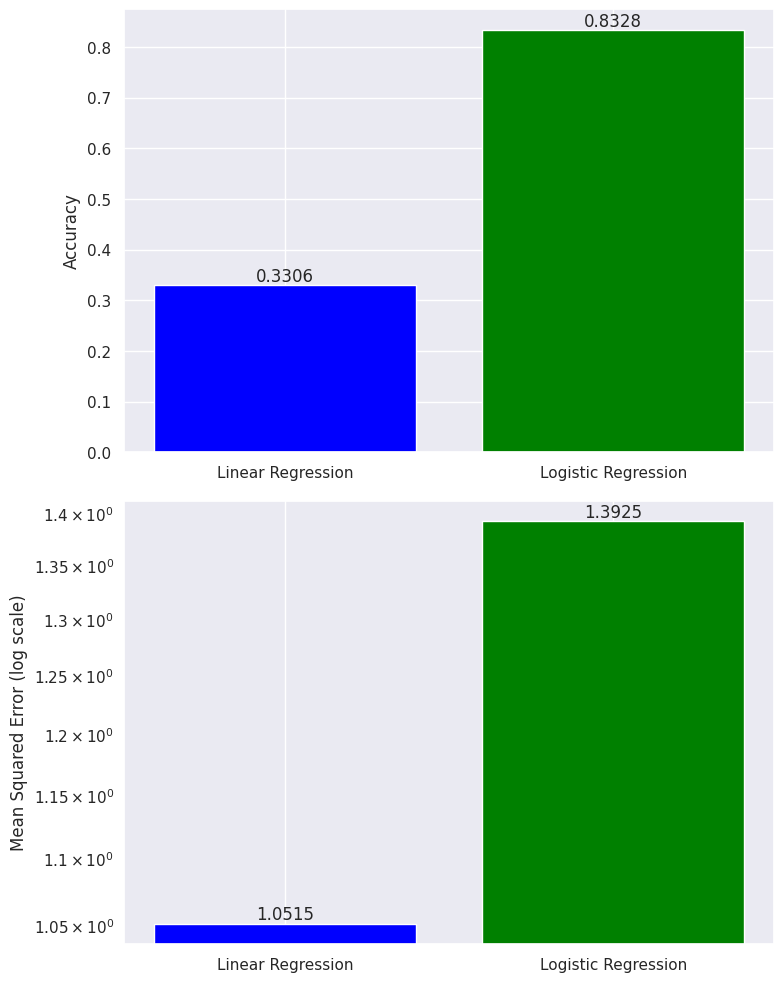

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


# Plotting
models = ['Linear Regression', 'Logistic Regression']
metrics = ['Accuracy', 'Mean Squared Error']
accuracy_values = [accuracy2, mse2]
mse_values = [accuracy1, mse1]

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

for i in range(2):
    ax[i].bar(models, [accuracy_values[i], mse_values[i]], color=['blue', 'green'])
    ax[i].set_ylabel(metrics[i])
    if i == 1:
        ax[i].set_yscale('log')
        ax[i].set_ylabel(metrics[i] + ' (log scale)')
    for j, value in enumerate([accuracy_values[i], mse_values[i]]):
        ax[i].text(j, value, str(round(value, 4)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


<ipython-input-57-356722c7ed79>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)


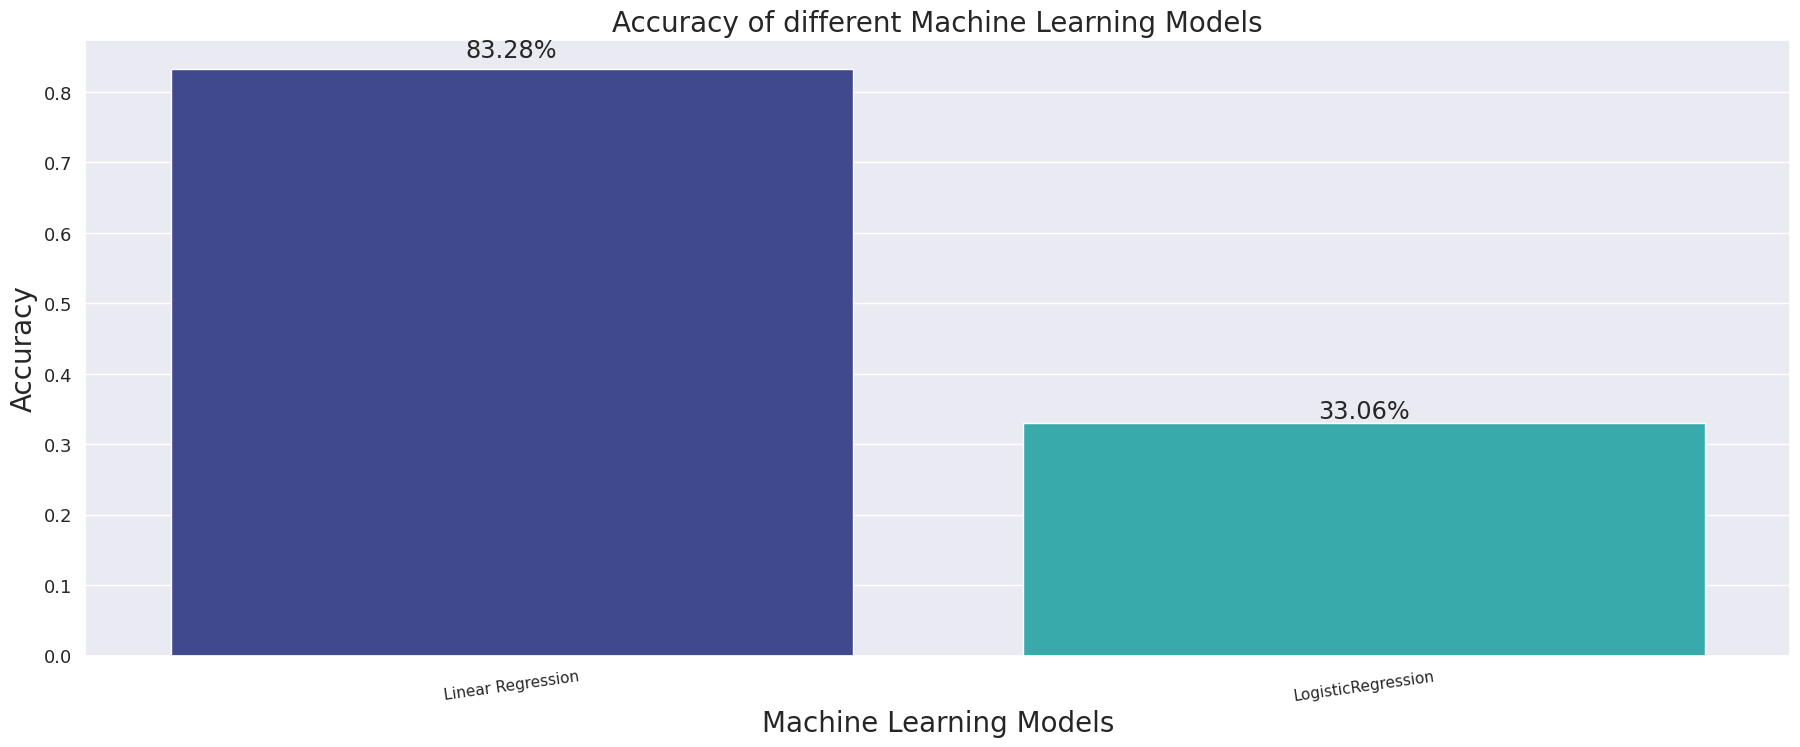

In [ ]:
mylist=[]
mylist2=[]
Accuracy1 = 0.8327645051194539
Accuracy2 = 0.33060109289617484
mylist.append(Accuracy1)
mylist2.append("Linear Regression")
mylist.append(Accuracy2)
mylist2.append("LogisticRegression")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Machine Learning Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Machine Learning Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()